In [205]:
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np

In [200]:
results = pd.read_csv('entry_results.csv', header=0)

In [201]:
results

,time_of_run,BATCH_SIZE,TRAIN_SPLIT,NUM_FEATURES,NUM_UNITS,NUM_USERS,NUM_EPOCHS,EPSILON,DELTA,NORMCLIP,...,PRIVATIZER,train_a_loss,train_p_loss,u_estimate_acc,loc_estimate_error,test_a_loss,signal_map_error,distortion_error,loc_error,density_error
0,2019-05-10 11:07:47.931960,128,0.8,24,32,9,1,0.1,0.00001,4.0,...,noise_privatizer,0.030192,-0.002269,98.437500,0.007395,0.055286,0.000000,0.000000,0.000000,0.000000
1,2019-05-10 11:13:53.632966,128,0.8,24,32,9,1,0.1,0.00001,4.0,...,noise_privatizer,0.102862,0.027601,98.437500,0.008610,0.120330,0.001794,0.009829,0.009197,0.011963
2,2019-05-10 11:19:23.620552,128,0.8,24,32,9,1,0.1,0.00001,4.0,...,noise_privatizer,0.298617,0.224475,96.093750,0.022377,0.111007,0.026050,0.039187,0.037040,1.665283
3,2019-05-10 11:24:34.964791,128,0.8,24,32,9,2,0.1,0.00001,4.0,...,noise_privatizer,0.118935,0.475719,98.437500,0.017757,0.052582,0.054401,0.040437,0.037654,0.157471
4,2019-05-10 11:32:33.514346,128,0.8,24,32,9,1,0.1,0.00001,4.0,...,noise_privatizer,0.077902,0.205976,94.531250,0.030251,0.137625,0.011566,0.040019,0.038052,0.211914
5,2019-05-10 11:35:43.055057,128,0.8,24,32,9,1,0.1,0.00001,4.0,...,noise_privatizer,0.192258,1.035250,94.140625,0.038615,0.176787,0.025223,0.091484,0.082380,0.448486
6,2019-05-10 11:40:09.737286,128,0.8,24,32,9,3,0.1,0.00001,4.0,...,noise_privatizer,0.247322,0.215541,93.359375,0.033617,0.173909,0.003776,0.087873,0.089510,0.233398
7,2019-05-10 11:55:59.763078,128,0.8,24,32,9,3,0.1,0.00001,4.0,...,noise_privatizer,0.364024,0.800243,91.015625,0.046964,0.245128,0.110811,0.159719,0.156705,0.567871
8,2019-05-13 20:27:03.657289,128,0.8,24,32,9,1,0.1,0.00001,4.0,...,noise_privatizer,0.468337,0.684556,89.062500,0.100681,0.311975,0.030074,0.239977,0.244604,0.618652
9,2019-05-13 20:30:29.593822,128,0.8,24,32,9,1,0.1,0.00001,4.0,...,noise_privatizer,0.568903,0.823035,83.984375,0.116673,0.497042,0.011640,0.363060,0.381782,0.472656


Text(0.5, 0.98, 'Noise Privatizer, Two Epochs of Training')

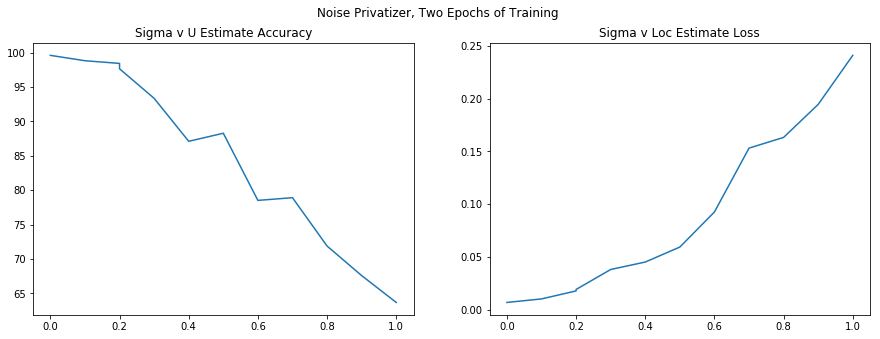

In [230]:
one_epoch = results.values[np.where(results.values[:,6]==1)]
two_epoch = results.values[np.where(results.values[:,6]==2)]

p = two_epoch
idx=np.argsort(p[:,10])
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(p[idx][:,10], p[idx][:,25])
ax[1].plot(p[idx][:,10], p[idx][:,26])
ax[0].set_title("Sigma v U Estimate Accuracy")
ax[1].set_title("Sigma v Loc Estimate Loss")
fig.suptitle("Noise Privatizer, Two Epochs of Training")

Text(0.5, 1.0, 'Sigma v Utility Error, Two Epochs')

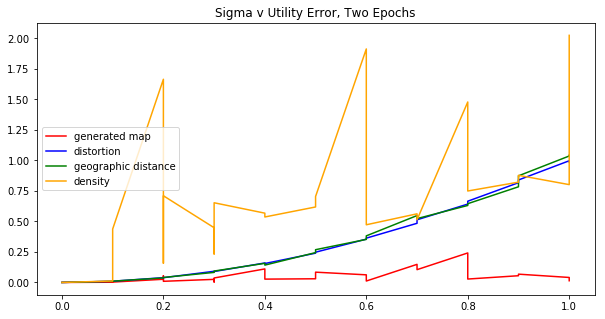

In [241]:
one_epoch = results.values[np.where(results.values[:,6]==1)]
two_epoch = results.values[np.where(results.values[:,6]==2)]

p = results.values
idx=np.argsort(p[:,10])

plt.figure(figsize=(10,5))
plt.plot(p[idx][:,10], p[idx][:,28],c='r')
plt.plot(p[idx][:,10], p[idx][:,29],c='b')
plt.plot(p[idx][:,10], p[idx][:,30],c='g')
plt.plot(p[idx][:,10], p[idx][:,31],c='orange')
plt.legend(["generated map","distortion","geographic distance","density"])
plt.title("Sigma v Utility Error, Two Epochs")

In [267]:
def analytical_gaussian_sigma(eta, epsilon, delta):
    def phi(x):
        return 1/2*(1+math.erf(x/math.sqrt(2)))
    delta_0 = phi(0)-math.e**epsilon*phi(-math.sqrt(2*epsilon))
    def Bplus(v):
        return phi(math.sqrt(epsilon*v))-math.e**epsilon*phi(-math.sqrt(epsilon*(v+2)))
    def Bminus(v):
        return phi(-math.sqrt(epsilon*v))-math.e**epsilon*phi(-math.sqrt(epsilon*(v+2)))
    if delta >= delta_0:
        print("here")
        vstar = 0
        while Bplus(vstar) <= delta:
            vstar += 1
            if vstar == 1000000:
                return 0
        if vstar == 0:
            print(0)
        alpha = math.sqrt(1+vstar/2)-math.sqrt(vstar/2)
    else:
        ustar = 0
        while Bminus(ustar) > delta:
            ustar += 1
        if ustar == 0:
            print(ustar)
        alpha = math.sqrt(1+ustar/2)+math.sqrt(ustar/2)
    sigma = alpha*eta/math.sqrt(2*epsilon)
    return sigma

Text(0.5, 1.0, 'Sigma varying with epsilon, holding norm_clip=7 (to clip 5.82% of entries) and delta=0.00001')

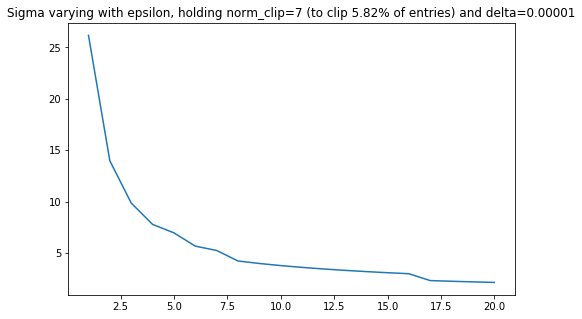

In [281]:
eta = 7
epsilon = np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19,20.0])
delta = 0.00001
plt.figure(figsize=(8,5))
sigma = [analytical_gaussian_sigma(eta, eps, delta) for eps in epsilon]
plt.plot(epsilon, np.array(sigma))
plt.title("Sigma varying with epsilon, holding norm_clip=7 (to clip 5.82% of entries) and delta=0.00001")